In [51]:
%run ./ml_model_init.ipynb

## Baseline Model


In [52]:
# Split the gk data into train and test sets
def_splits = split_data(def_player_data)

#### Linear Model


In [53]:

base_def_lin_reg = Linear_regression(def_splits['feature_train'], def_splits['features_test'],
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = pd.DataFrame({"base_def_lin_reg": [base_def_lin_reg['train_MAE'], base_def_lin_reg['test_MAE'], base_def_lin_reg['train_RMSE'], base_def_lin_reg['test_RMSE'], base_def_lin_reg['cv_rmse'], base_def_lin_reg['R2_train'], base_def_lin_reg['R2_test']]},
                                                        index=(['train_MAE','test_MAE', 'train_RMSE', 'test_RMSE', 'cv_rmse', 'R2_train', 'R2_test']))

def_evaluation_stats

Training set RMSE: 1.0137670054128267
Test set RMSE: 0.9422308397158391
Training set R2: 0.8430378480346071
Test set R2: 0.8445335632554289


,base_def_lin_reg
train_MAE,0.710705
test_MAE,0.681135
train_RMSE,1.013767
test_RMSE,0.942231
cv_rmse,1.021316
R2_train,0.843038
R2_test,0.844534


#### DecisionTree Model


In [54]:
base_def_dt_reg = DecisionTreeRegression(def_splits['feature_train'], def_splits['features_test'],
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(base_def_dt_reg = [base_def_dt_reg['train_MAE'], base_def_dt_reg['test_MAE'], base_def_dt_reg['train_RMSE'], base_def_dt_reg['test_RMSE'], base_def_dt_reg['cv_rmse'], base_def_dt_reg['R2_train'], base_def_dt_reg['R2_test']])

def_evaluation_stats



,base_def_lin_reg,base_def_dt_reg
train_MAE,0.710705,1.406350e-15
test_MAE,0.681135,5.314494e-01
train_RMSE,1.013767,2.472395e-15
test_RMSE,0.942231,1.206561e+00
cv_rmse,1.021316,1.357820e+00
R2_train,0.843038,1.000000e+00
R2_test,0.844534,7.450704e-01


#### RandomForest Model


In [55]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
base_def_rf_reg = RandomForestRegression(def_splits['feature_train'], def_splits['features_test'],
                               def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(base_def_rf_reg = [base_def_rf_reg['train_MAE'], base_def_rf_reg['test_MAE'], base_def_rf_reg['train_RMSE'], base_def_rf_reg['test_RMSE'], base_def_rf_reg['cv_rmse'], base_def_rf_reg['R2_train'], base_def_rf_reg['R2_test']])

def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg
train_MAE,0.710705,1.406350e-15,0.400927
test_MAE,0.681135,5.314494e-01,0.495824
train_RMSE,1.013767,2.472395e-15,0.686619
test_RMSE,0.942231,1.206561e+00,0.901930
cv_rmse,1.021316,1.357820e+00,0.988056
R2_train,0.843038,1.000000e+00,0.927997
R2_test,0.844534,7.450704e-01,0.857548


#### XgBoost Model


In [56]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
base_def_xgb_reg = XGBoostRegression(def_splits['feature_train'], def_splits['features_test'], def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(base_def_xgb_reg = [base_def_xgb_reg['train_MAE'], base_def_xgb_reg['test_MAE'], base_def_xgb_reg['train_RMSE'], base_def_xgb_reg['test_RMSE'], base_def_xgb_reg['cv_rmse'], base_def_xgb_reg['R2_train'], base_def_xgb_reg['R2_test']])
def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664
test_MAE,0.681135,5.314494e-01,0.495824,0.555320
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506
R2_train,0.843038,1.000000e+00,0.927997,0.882366
R2_test,0.844534,7.450704e-01,0.857548,0.857288


# Feature engineering


### VarianceThreshold


In [57]:
VT_scaler = StandardScaler()
df_def_train_scaled = pd.DataFrame(VT_scaler.fit_transform(def_splits['feature_train']), columns=def_splits['feature_train'].columns)
df_def_test_scaled = pd.DataFrame(VT_scaler.transform(def_splits['features_test']), columns=def_splits['features_test'].columns)

selector = VarianceThreshold(threshold = 0.1)
selector.fit_transform(df_def_train_scaled)

def_threshold_columns = df_def_train_scaled.columns[selector.get_support()]

def_threshold_train = df_def_train_scaled[def_threshold_columns]
def_threshold_test = df_def_test_scaled[def_threshold_columns]

def_threshold_train.shape, def_threshold_test.shape

((4385, 20), (1097, 20))

#### Model(VT)


##### Linear Model


In [58]:

VarT_def_lin_reg = Linear_regression(def_threshold_train, def_threshold_test,
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(VarT_def_lin_reg =  [ VarT_def_lin_reg['train_MAE'], VarT_def_lin_reg['test_MAE'], VarT_def_lin_reg['train_RMSE'], VarT_def_lin_reg['test_RMSE'], VarT_def_lin_reg['cv_rmse'], VarT_def_lin_reg['R2_train'], VarT_def_lin_reg['R2_test']])

def_evaluation_stats

Training set RMSE: 1.013767005412827
Test set RMSE: 0.9422308397158409
Training set R2: 0.843037848034607
Test set R2: 0.8445335632554284


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534


##### DecisionTree Model


In [59]:
VarT_def_dt_reg = DecisionTreeRegression(def_threshold_train, def_threshold_test,
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(VarT_def_dt_reg = [VarT_def_dt_reg['train_MAE'], VarT_def_dt_reg['test_MAE'], VarT_def_dt_reg['train_RMSE'], VarT_def_dt_reg['test_RMSE'], VarT_def_dt_reg['cv_rmse'], VarT_def_dt_reg['R2_train'], VarT_def_dt_reg['R2_test']])

def_evaluation_stats



,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705,1.525095e-15
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135,5.360073e-01
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767,2.738925e-15
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231,1.187906e+00
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316,1.347966e+00
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038,1.000000e+00
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534,7.528923e-01


##### RandomForest Model


In [60]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
VarT_def_rf_reg = RandomForestRegression(def_threshold_train, def_threshold_test,
                               def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(VarT_def_rf_reg = [VarT_def_rf_reg['train_MAE'], VarT_def_rf_reg['test_MAE'], VarT_def_rf_reg['train_RMSE'], VarT_def_rf_reg['test_RMSE'], VarT_def_rf_reg['cv_rmse'], VarT_def_rf_reg['R2_train'], VarT_def_rf_reg['R2_test']])

def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705,1.525095e-15,0.400512
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135,5.360073e-01,0.495705
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767,2.738925e-15,0.686199
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231,1.187906e+00,0.900919
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316,1.347966e+00,0.986375
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038,1.000000e+00,0.928085
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534,7.528923e-01,0.857868


##### XgBoost Model


In [61]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
VarT_def_xgb_reg = XGBoostRegression(def_threshold_train, def_threshold_test, def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(VarT_def_xgb_reg = [VarT_def_xgb_reg['train_MAE'], VarT_def_xgb_reg['test_MAE'], VarT_def_xgb_reg['train_RMSE'], VarT_def_xgb_reg['test_RMSE'], VarT_def_xgb_reg['cv_rmse'], VarT_def_xgb_reg['R2_train'], VarT_def_xgb_reg['R2_test']])
def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705,1.525095e-15,0.400512,0.541664
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135,5.360073e-01,0.495705,0.555320
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767,2.738925e-15,0.686199,0.877621
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231,1.187906e+00,0.900919,0.902752
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316,1.347966e+00,0.986375,0.998506
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038,1.000000e+00,0.928085,0.882366
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534,7.528923e-01,0.857868,0.857288


### Feature selection techniques


#### K-best features


In [62]:

from sklearn.feature_selection import SelectKBest, mutual_info_regression

k_rf_model = RandomForestRegressor(n_estimators=20,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18)

score_list  = []

for k in range(1, def_splits['features_test'].shape[1]):
  selector = SelectKBest(mutual_info_regression, k=k)
  k_sel_X_train =  selector.fit_transform(def_threshold_train, def_splits['target_train'])

  k_rf_model.fit(k_sel_X_train, def_splits['target_train'])

  k_sel_cols = def_threshold_train.columns[selector.get_support()]
  k_sel_X_test = def_threshold_test[k_sel_cols]
  score = round(k_rf_model.score(k_sel_X_test.values, def_splits['target_test'] ), 3)

  score_list.append(score)
print(score_list, score_list.index(max(score_list)))
num_of_feat = score_list.index(max(score_list)) # find the highest score. We will use  that as the value of k

[0.682, 0.78, 0.795, 0.815, 0.816, 0.826, 0.823, 0.829, 0.822, 0.826, 0.834, 0.83, 0.823, 0.824, 0.826, 0.84, 0.828, 0.836, 0.838] 15


In [63]:
selector = SelectKBest(mutual_info_regression, k=num_of_feat+1)
selector.fit_transform(def_threshold_train, def_splits['target_train'])

sel_feats = selector.get_feature_names_out()
k_sel_X_train = def_threshold_train[sel_feats]
k_sel_X_test = def_threshold_test[sel_feats]

##### Model (KBest)


###### Linear Model


In [64]:

KBest_def_lin_reg = Linear_regression(k_sel_X_train, k_sel_X_test,
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(KBest_def_lin_reg =  [KBest_def_lin_reg['train_MAE'], KBest_def_lin_reg['test_MAE'], KBest_def_lin_reg['train_RMSE'], KBest_def_lin_reg['test_RMSE'], KBest_def_lin_reg['cv_rmse'], KBest_def_lin_reg['R2_train'], KBest_def_lin_reg['R2_test']])

def_evaluation_stats

Training set RMSE: 1.0192317728058298
Test set RMSE: 0.94326630106428
Training set R2: 0.8413410606044966
Test set R2: 0.8441916768866821


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705,1.525095e-15,0.400512,0.541664,0.711744
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135,5.360073e-01,0.495705,0.555320,0.680867
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767,2.738925e-15,0.686199,0.877621,1.019232
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231,1.187906e+00,0.900919,0.902752,0.943266
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316,1.347966e+00,0.986375,0.998506,1.025704
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038,1.000000e+00,0.928085,0.882366,0.841341
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534,7.528923e-01,0.857868,0.857288,0.844192


###### DecisionTree Model


In [65]:
KBest_def_dt_reg = DecisionTreeRegression(k_sel_X_train, k_sel_X_test,
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(KBest_def_dt_reg = [KBest_def_dt_reg['train_MAE'], KBest_def_dt_reg['test_MAE'], KBest_def_dt_reg['train_RMSE'], KBest_def_dt_reg['test_RMSE'], KBest_def_dt_reg['cv_rmse'], KBest_def_dt_reg['R2_train'], KBest_def_dt_reg['R2_test']])

def_evaluation_stats



,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705,1.525095e-15,0.400512,0.541664,0.711744,1.303151e-15
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135,5.360073e-01,0.495705,0.555320,0.680867,5.287147e-01
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767,2.738925e-15,0.686199,0.877621,1.019232,2.279511e-15
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231,1.187906e+00,0.900919,0.902752,0.943266,1.190206e+00
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316,1.347966e+00,0.986375,0.998506,1.025704,1.360913e+00
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038,1.000000e+00,0.928085,0.882366,0.841341,1.000000e+00
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534,7.528923e-01,0.857868,0.857288,0.844192,7.519345e-01


###### RandomForest Model


In [66]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
KBest_def_rf_reg = RandomForestRegression(k_sel_X_train, k_sel_X_test,
                               def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(KBest_def_rf_reg = [KBest_def_rf_reg['train_MAE'], KBest_def_rf_reg['test_MAE'], KBest_def_rf_reg['train_RMSE'], KBest_def_rf_reg['test_RMSE'], KBest_def_rf_reg['cv_rmse'], KBest_def_rf_reg['R2_train'], KBest_def_rf_reg['R2_test']])

def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705,1.525095e-15,0.400512,0.541664,0.711744,1.303151e-15,0.400334
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135,5.360073e-01,0.495705,0.555320,0.680867,5.287147e-01,0.495601
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767,2.738925e-15,0.686199,0.877621,1.019232,2.279511e-15,0.686312
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231,1.187906e+00,0.900919,0.902752,0.943266,1.190206e+00,0.901867
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316,1.347966e+00,0.986375,0.998506,1.025704,1.360913e+00,0.981863
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038,1.000000e+00,0.928085,0.882366,0.841341,1.000000e+00,0.928061
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534,7.528923e-01,0.857868,0.857288,0.844192,7.519345e-01,0.857568


###### XgBoost Model


In [67]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
KBest_def_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(KBest_def_xgb_reg = [KBest_def_xgb_reg['train_MAE'], KBest_def_xgb_reg['test_MAE'], KBest_def_xgb_reg['train_RMSE'], KBest_def_xgb_reg['test_RMSE'], KBest_def_xgb_reg['cv_rmse'], KBest_def_xgb_reg['R2_train'], KBest_def_xgb_reg['R2_test']])
def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705,1.525095e-15,0.400512,0.541664,0.711744,1.303151e-15,0.400334,0.542703
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135,5.360073e-01,0.495705,0.555320,0.680867,5.287147e-01,0.495601,0.557059
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767,2.738925e-15,0.686199,0.877621,1.019232,2.279511e-15,0.686312,0.877704
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231,1.187906e+00,0.900919,0.902752,0.943266,1.190206e+00,0.901867,0.900154
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316,1.347966e+00,0.986375,0.998506,1.025704,1.360913e+00,0.981863,0.996829
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038,1.000000e+00,0.928085,0.882366,0.841341,1.000000e+00,0.928061,0.882344
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534,7.528923e-01,0.857868,0.857288,0.844192,7.519345e-01,0.857568,0.858109


#### Mutual Information


In [68]:
from sklearn.feature_selection import mutual_info_regression
# def_sel_X_train
mutual_info = mutual_info_regression(k_sel_X_train, def_splits['target_train'])
mutual_info

array([0.1667976 , 0.08960187, 0.02701028, 0.06612946, 0.05211   ,
       0.05009174, 0.04467021, 0.08988307, 0.19519848, 0.48764737,
       0.22688248, 0.07874144, 0.08282002, 0.03683395, 0.08360787,
       0.1809091 ])

In [69]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = k_sel_X_train.columns
mutual_info.sort_values(ascending=False)

clean_sheets                  0.487647
ict_index                     0.226882
expected_goals_conceded       0.195198
xP                            0.180909
minutes                       0.166798
expected_goal_involvements    0.089883
yellow_cards                  0.089602
xGChain                       0.083608
threat                        0.082820
xGBuildup                     0.078741
expected_goals                0.066129
expected_assists              0.052110
npxG                          0.050092
shots                         0.044670
key_passes                    0.036834
red_cards                     0.027010
dtype: float64

<Axes: >

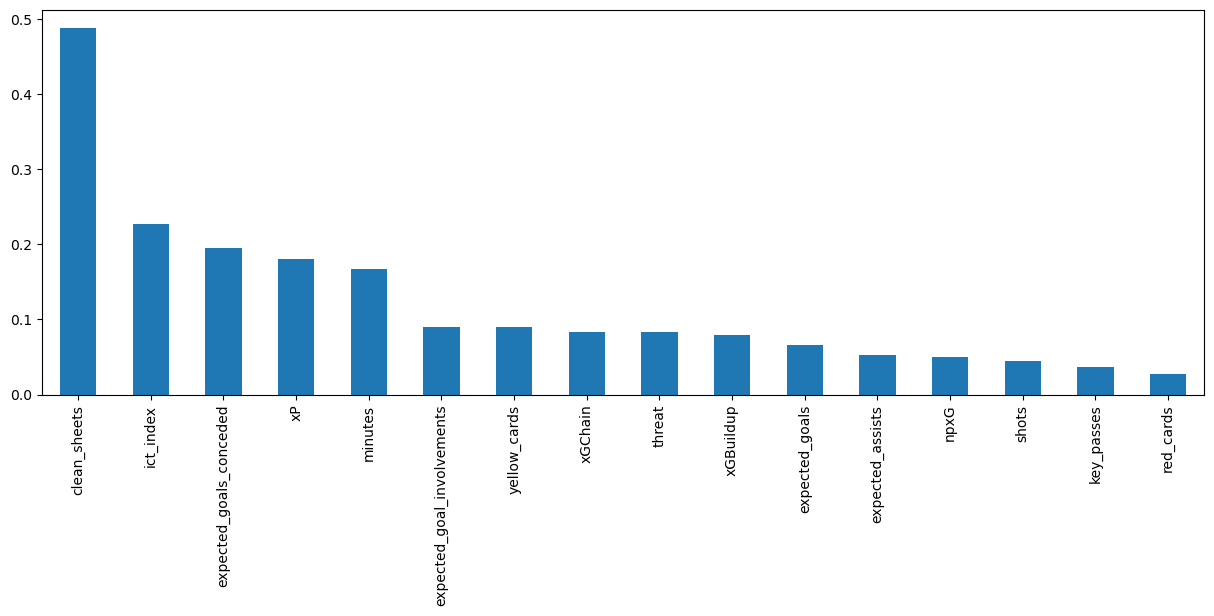

In [70]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

##### Select to 20% perct


In [71]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(k_sel_X_train, def_splits['target_train'])

selected_top_columns.get_support()

array([ True,  True, False, False, False, False, False,  True,  True,
        True,  True, False,  True, False, False,  True])

In [72]:
def_20_columns = k_sel_X_train.columns[selected_top_columns.get_support()]

def_20_train = k_sel_X_train[def_20_columns]
def_20_test = k_sel_X_test[def_20_columns]


##### Model (MI)


###### Linear Model


In [73]:

MI_def_lin_reg = Linear_regression(def_20_train, def_20_test,
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(MI_def_lin_reg =  [MI_def_lin_reg['train_MAE'], MI_def_lin_reg['test_MAE'], MI_def_lin_reg['train_RMSE'], MI_def_lin_reg['test_RMSE'], MI_def_lin_reg['cv_rmse'], MI_def_lin_reg['R2_train'], MI_def_lin_reg['R2_test']])

def_evaluation_stats

Training set RMSE: 1.1766454231922214
Test set RMSE: 1.0863979291478394
Training set R2: 0.7885489435318602
Test set R2: 0.7933193240204848


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg,MI_def_lin_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705,1.525095e-15,0.400512,0.541664,0.711744,1.303151e-15,0.400334,0.542703,0.772339
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135,5.360073e-01,0.495705,0.555320,0.680867,5.287147e-01,0.495601,0.557059,0.749081
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767,2.738925e-15,0.686199,0.877621,1.019232,2.279511e-15,0.686312,0.877704,1.176645
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231,1.187906e+00,0.900919,0.902752,0.943266,1.190206e+00,0.901867,0.900154,1.086398
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316,1.347966e+00,0.986375,0.998506,1.025704,1.360913e+00,0.981863,0.996829,1.178833
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038,1.000000e+00,0.928085,0.882366,0.841341,1.000000e+00,0.928061,0.882344,0.788549
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534,7.528923e-01,0.857868,0.857288,0.844192,7.519345e-01,0.857568,0.858109,0.793319


###### DecisionTree Model


In [74]:
MI_def_dt_reg = DecisionTreeRegression(def_20_train, def_20_test,
                               def_splits['target_train'], def_splits['target_test'])

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(MI_def_dt_reg = [MI_def_dt_reg['train_MAE'], MI_def_dt_reg['test_MAE'], MI_def_dt_reg['train_RMSE'], MI_def_dt_reg['test_RMSE'], MI_def_dt_reg['cv_rmse'], MI_def_dt_reg['R2_train'], MI_def_dt_reg['R2_test']])

def_evaluation_stats



,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg,MI_def_lin_reg,MI_def_dt_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705,1.525095e-15,0.400512,0.541664,0.711744,1.303151e-15,0.400334,0.542703,0.772339,1.333736e-15
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135,5.360073e-01,0.495705,0.555320,0.680867,5.287147e-01,0.495601,0.557059,0.749081,6.627165e-01
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767,2.738925e-15,0.686199,0.877621,1.019232,2.279511e-15,0.686312,0.877704,1.176645,2.579720e-15
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231,1.187906e+00,0.900919,0.902752,0.943266,1.190206e+00,0.901867,0.900154,1.086398,1.403538e+00
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316,1.347966e+00,0.986375,0.998506,1.025704,1.360913e+00,0.981863,0.996829,1.178833,1.490995e+00
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038,1.000000e+00,0.928085,0.882366,0.841341,1.000000e+00,0.928061,0.882344,0.788549,1.000000e+00
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534,7.528923e-01,0.857868,0.857288,0.844192,7.519345e-01,0.857568,0.858109,0.793319,6.550389e-01


###### RandomForest Model


In [75]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
MI_def_rf_reg = RandomForestRegression(def_20_train, def_20_test,
                               def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(MI_def_rf_reg = [MI_def_rf_reg['train_MAE'], MI_def_rf_reg['test_MAE'], MI_def_rf_reg['train_RMSE'], MI_def_rf_reg['test_RMSE'], MI_def_rf_reg['cv_rmse'], MI_def_rf_reg['R2_train'], MI_def_rf_reg['R2_test']])

def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg,MI_def_lin_reg,MI_def_dt_reg,MI_def_rf_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705,1.525095e-15,0.400512,0.541664,0.711744,1.303151e-15,0.400334,0.542703,0.772339,1.333736e-15,0.434975
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135,5.360073e-01,0.495705,0.555320,0.680867,5.287147e-01,0.495601,0.557059,0.749081,6.627165e-01,0.524696
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767,2.738925e-15,0.686199,0.877621,1.019232,2.279511e-15,0.686312,0.877704,1.176645,2.579720e-15,0.759857
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231,1.187906e+00,0.900919,0.902752,0.943266,1.190206e+00,0.901867,0.900154,1.086398,1.403538e+00,0.974480
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316,1.347966e+00,0.986375,0.998506,1.025704,1.360913e+00,0.981863,0.996829,1.178833,1.490995e+00,1.090473
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038,1.000000e+00,0.928085,0.882366,0.841341,1.000000e+00,0.928061,0.882344,0.788549,1.000000e+00,0.911817
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534,7.528923e-01,0.857868,0.857288,0.844192,7.519345e-01,0.857568,0.858109,0.793319,6.550389e-01,0.833709


###### XgBoost Model


In [76]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
MI_def_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(MI_def_xgb_reg = [MI_def_xgb_reg['train_MAE'], MI_def_xgb_reg['test_MAE'], MI_def_xgb_reg['train_RMSE'], MI_def_xgb_reg['test_RMSE'], MI_def_xgb_reg['cv_rmse'], MI_def_xgb_reg['R2_train'], MI_def_xgb_reg['R2_test']])
def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg,MI_def_lin_reg,MI_def_dt_reg,MI_def_rf_reg,MI_def_xgb_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705,1.525095e-15,0.400512,0.541664,0.711744,1.303151e-15,0.400334,0.542703,0.772339,1.333736e-15,0.434975,0.542703
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135,5.360073e-01,0.495705,0.555320,0.680867,5.287147e-01,0.495601,0.557059,0.749081,6.627165e-01,0.524696,0.557059
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767,2.738925e-15,0.686199,0.877621,1.019232,2.279511e-15,0.686312,0.877704,1.176645,2.579720e-15,0.759857,0.877704
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231,1.187906e+00,0.900919,0.902752,0.943266,1.190206e+00,0.901867,0.900154,1.086398,1.403538e+00,0.974480,0.900154
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316,1.347966e+00,0.986375,0.998506,1.025704,1.360913e+00,0.981863,0.996829,1.178833,1.490995e+00,1.090473,0.996829
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038,1.000000e+00,0.928085,0.882366,0.841341,1.000000e+00,0.928061,0.882344,0.788549,1.000000e+00,0.911817,0.882344
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534,7.528923e-01,0.857868,0.857288,0.844192,7.519345e-01,0.857568,0.858109,0.793319,6.550389e-01,0.833709,0.858109


# Best Stats


In [77]:
def_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg,MI_def_lin_reg,MI_def_dt_reg,MI_def_rf_reg,MI_def_xgb_reg
train_MAE,0.710705,1.406350e-15,0.400927,0.541664,0.710705,1.525095e-15,0.400512,0.541664,0.711744,1.303151e-15,0.400334,0.542703,0.772339,1.333736e-15,0.434975,0.542703
test_MAE,0.681135,5.314494e-01,0.495824,0.555320,0.681135,5.360073e-01,0.495705,0.555320,0.680867,5.287147e-01,0.495601,0.557059,0.749081,6.627165e-01,0.524696,0.557059
train_RMSE,1.013767,2.472395e-15,0.686619,0.877621,1.013767,2.738925e-15,0.686199,0.877621,1.019232,2.279511e-15,0.686312,0.877704,1.176645,2.579720e-15,0.759857,0.877704
test_RMSE,0.942231,1.206561e+00,0.901930,0.902752,0.942231,1.187906e+00,0.900919,0.902752,0.943266,1.190206e+00,0.901867,0.900154,1.086398,1.403538e+00,0.974480,0.900154
cv_rmse,1.021316,1.357820e+00,0.988056,0.998506,1.021316,1.347966e+00,0.986375,0.998506,1.025704,1.360913e+00,0.981863,0.996829,1.178833,1.490995e+00,1.090473,0.996829
R2_train,0.843038,1.000000e+00,0.927997,0.882366,0.843038,1.000000e+00,0.928085,0.882366,0.841341,1.000000e+00,0.928061,0.882344,0.788549,1.000000e+00,0.911817,0.882344
R2_test,0.844534,7.450704e-01,0.857548,0.857288,0.844534,7.528923e-01,0.857868,0.857288,0.844192,7.519345e-01,0.857568,0.858109,0.793319,6.550389e-01,0.833709,0.858109


In [78]:

# - KBEST: rf

## Fine tuning the models


In [79]:
model = RandomForestRegressor()

param_grid = {'n_estimators': [8, 10, 12, 14, 16, 18, 20]}

# Define the possible values of the hyperparameter
grid = {
    'n_estimators': [8, 10, 12, 14, 16, 18, 20, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'random_state': [18]
}

In [80]:
def_search = GridSearchCV(model, grid, cv=5,
                              scoring='neg_root_mean_squared_error').fit(
    def_threshold_train, def_splits['target_train'])

c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
550 fits failed out of a total of 2200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
550 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Users\

In [81]:
print("The best midfielder hyperparameters are ", def_search.best_params_)

The best midfielder hyperparameters are  {'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 18}
